<a href="https://colab.research.google.com/github/just-suraj-j/NaiveModel/blob/main/NN_exploration_Neurons_Architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets._samples_generator import make_blobs,make_classification
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot 
import numpy as np
import plotly.express as px
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

In [2]:
class DataGenerator:
  def __init__(self,totalDataSamples,noOfClusters,featureCount):
    self.totalDataSamples = totalDataSamples
    self.noOfClusters = noOfClusters
    self.X,self.y=make_blobs(n_samples=totalDataSamples, centers=noOfClusters, n_features=featureCount,cluster_std=2,random_state=2)

  def TrainTestSplit(self, trainTestSplitRatio=.6):
    self.trainTestSplitRatio= trainTestSplitRatio
    self.y=to_categorical(self.y)
    self.n_train = int(round(self.totalDataSamples*trainTestSplitRatio,0))
    self.trainX, self.testX= self.X[:self.n_train,:],self.X[:self.n_train,:]
    self.trainy, self.testy= self.y[:self.n_train,:],self.y[:self.n_train,:]
    return (self.trainX,self.trainy ,self.testX, self.testy)
  
  def Plot(self):
    for class_value in range(self.noOfClusters):
      row_ix = np.where(self.y==class_value)
      pyplot.scatter(self.X[row_ix,0],self.X[row_ix,1])
    pyplot.show()


In [3]:
totalDataSamples=5000
noOfClusters=100
featureCount=200

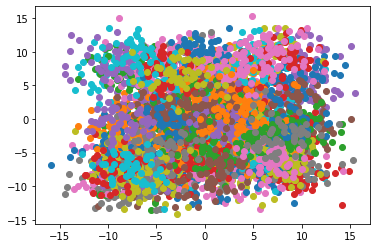

In [4]:
data1= DataGenerator(totalDataSamples, noOfClusters,featureCount)
data1.Plot()
trainX, trainy, testX,testy = data1.TrainTestSplit()

In [16]:
class NaiveModel:

  def __init__(self):
    self.model=Sequential()
    self.batchsize=256
  def BuildSequential_SingleLayer(self,inputDimensions,noOfClasses,neuronCountForLayer):
    self.model.add(Dense(neuronCountForLayer,input_dim=inputDimensions,activation='relu',kernel_initializer='he_uniform'))
    self.model.add(Dense(noOfClasses,activation='softmax'))
    opt=SGD(lr=.01,momentum=0.66)
    self.model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
    print(self.model.summary())
  def BuildSequential_MultiLayer_Funnel(self,inputDimensions,noOfClasses,firstlayerNeurons=50,reduceBy=10):
    self.model.add(Dense(firstlayerNeurons,input_dim=inputDimensions,activation='relu',kernel_initializer='he_uniform'))
    for neuronCount in range(firstlayerNeurons-reduceBy,noOfClasses,-reduceBy):
      self.model.add(Dense(neuronCount,activation='relu',kernel_initializer='he_uniform'))
    self.model.add(Dense(noOfClasses,activation='softmax'))
    opt=SGD(lr=.01,momentum=0.66)
    self.model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
    print(self.model.summary())
  
  def BuildSequential_MultiLayer(self,inputDimensions,noOfClasses,layerNeurons=50,repeat=10):
    self.model.add(Dense(layerNeurons,input_dim=inputDimensions,activation='relu',kernel_initializer='he_uniform'))
    for i in range(1,repeat):
      self.model.add(Dense(layerNeurons,activation='relu',kernel_initializer='he_uniform'))
    self.model.add(Dense(noOfClasses,activation='softmax'))
    opt=SGD(lr=.01,momentum=0.66)
    self.model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
    print(self.model.summary())

  def Fit(self,trainX,trainY,testX,testy,noOfEpochs=100,verbose_out=0):
    self.history=self.model.fit(trainX,trainY, validation_data=(testX,testy), epochs=noOfEpochs,verbose=verbose_out,batch_size=self.batchsize)
    _, self.test_accuracy=self.model.evaluate(testX,testy,verbose=verbose_out)
    self.test_accuracy = round(self.test_accuracy,3)

  
  def PlotFit(self):
    h1=self.history.history
    pyplot.figure(figsize=(20,6))
    pyplot.subplot(1,3,1) 
    ax= sns.lineplot(y=h1['val_accuracy'],x=range(len(h1['val_accuracy'])),label='val_accuracy',palette='binary')
    ax.set(xlabel='epochs',ylabel='val_accuracy')
    ax= sns.lineplot(y=h1['accuracy'],x=range(len(h1['val_accuracy'])),label='accuracy',palette='flare')
    ax.set(xlabel='epochs',ylabel='accuracy')
    pyplot.title('Epochs vs Accuracy(Accuracy='+str(self.test_accuracy)+')')
    pyplot.subplot(1,3,2)
    ax= sns.lineplot(x=h1['accuracy'],y=h1['val_accuracy'],label='accuracy vs val_accuracy',palette='binary',color='green',sort=False)
    ax.set(xlabel='epochs',ylabel='val_accuracy')
    pyplot.legend()
    pyplot.title('Validate vs Train Accuracy(Accuracy='+str(self.test_accuracy)+')')
    pyplot.subplot(1,3,3)
    ax= sns.lineplot(y=h1['val_loss'],x= range(len(h1['val_loss'])),label='Loss Convergence',color='red')
    ax.set(xlabel='epochs',ylabel='val loss')
    pyplot.legend()
    pyplot.title('Loss(batch='+str(self.test_accuracy)+')')
    pyplot.show()

def NaiveModelFactory_SingleLayer(neuronCount,trainX,trainy,testX,testy):
  model1= NaiveModel()
  model1.BuildSequential_SingleLayer(trainX.shape[1],trainy.shape[1],neuronCount)
  model1.Fit(trainX,trainy,testX,testy)
  model1.PlotFit()   

def NaiveModelFactory_SingleLayer(neuronCount,trainX,trainy,testX,testy):
  model1= NaiveModel()
  model1.BuildSequential_SingleLayer(trainX.shape[1],trainy.shape[1],neuronCount)
  model1.Fit(trainX,trainy,testX,testy)
  model1.PlotFit() 

def NaiveModelFactory_MultiLayer(LayerneuronCount,LayerrepeatCount,trainX,trainy,testX,testy):
  model1= NaiveModel()
  model1.BuildSequential_MultiLayer(trainX.shape[1],trainy.shape[1],LayerneuronCount,LayerrepeatCount)
  model1.Fit(trainX,trainy,testX,testy)
  model1.PlotFit() 

def NaiveModelFactory_MultiLayer_Funnel(firstlayerneuronCount,reduceNeuronBy,trainX,trainy,testX,testy):
  model1= NaiveModel()
  model1.BuildSequential_MultiLayer_Funnel(trainX.shape[1],trainy.shape[1],firstlayerneuronCount,reduceNeuronBy)
  model1.Fit(trainX,trainy,testX,testy)
  model1.PlotFit() 


Running for Single Layer Model with Neuron Count: 2
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 2)                 402       
                                                                 
 dense_15 (Dense)            (None, 100)               300       
                                                                 
Total params: 702
Trainable params: 702
Non-trainable params: 0
_________________________________________________________________
None


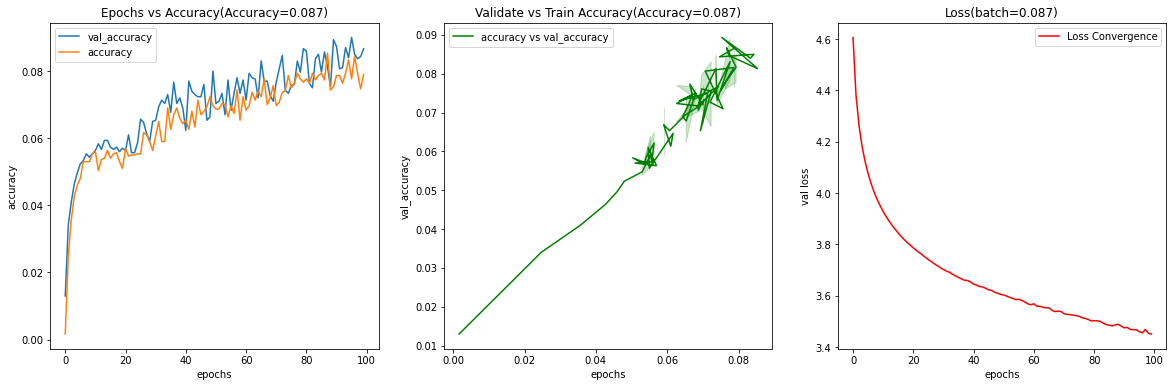

Running for Single Layer Model with Neuron Count: 4
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 4)                 804       
                                                                 
 dense_17 (Dense)            (None, 100)               500       
                                                                 
Total params: 1,304
Trainable params: 1,304
Non-trainable params: 0
_________________________________________________________________
None


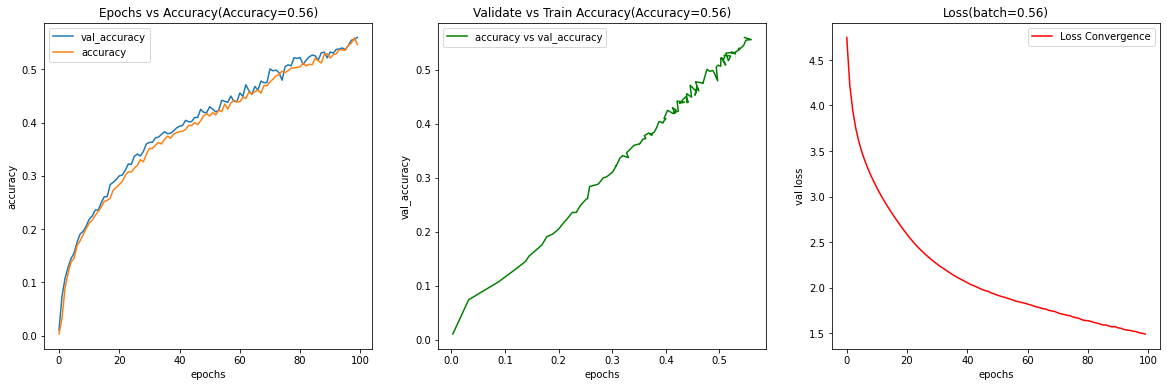

Running for Single Layer Model with Neuron Count: 6
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 6)                 1206      
                                                                 
 dense_19 (Dense)            (None, 100)               700       
                                                                 
Total params: 1,906
Trainable params: 1,906
Non-trainable params: 0
_________________________________________________________________
None


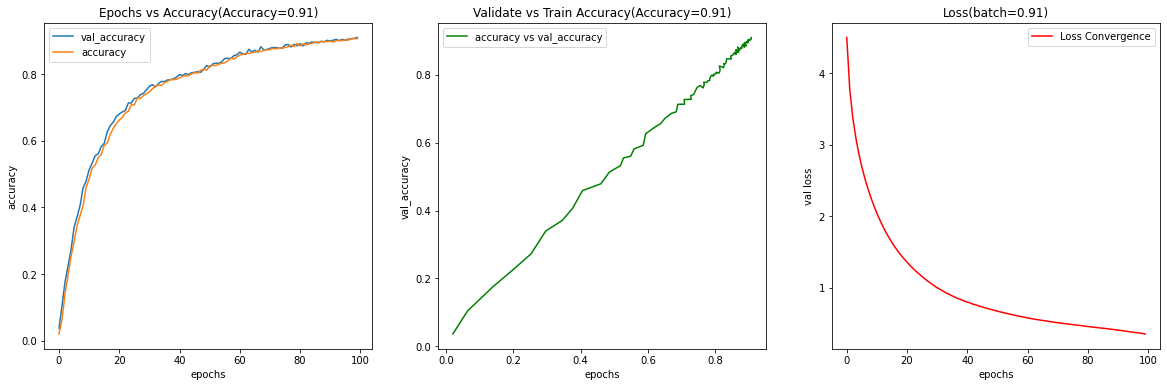

Running for Single Layer Model with Neuron Count: 8
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 8)                 1608      
                                                                 
 dense_21 (Dense)            (None, 100)               900       
                                                                 
Total params: 2,508
Trainable params: 2,508
Non-trainable params: 0
_________________________________________________________________
None


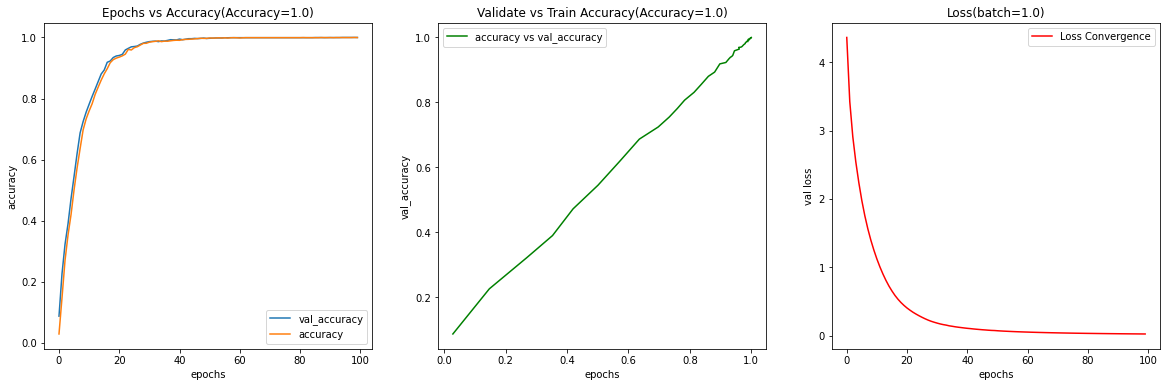

In [17]:
if(True):
  neuronCount = range(2,10,2)
  for i in range(len(neuronCount)):
    print('Running for Single Layer Model with Neuron Count:',neuronCount[i])
    NaiveModelFactory_SingleLayer(neuronCount[i],trainX,trainy,testX,testy)

Running for multilayer models with layer 2
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 10)                2010      
                                                                 
 dense_23 (Dense)            (None, 10)                110       
                                                                 
 dense_24 (Dense)            (None, 100)               1100      
                                                                 
Total params: 3,220
Trainable params: 3,220
Non-trainable params: 0
_________________________________________________________________
None


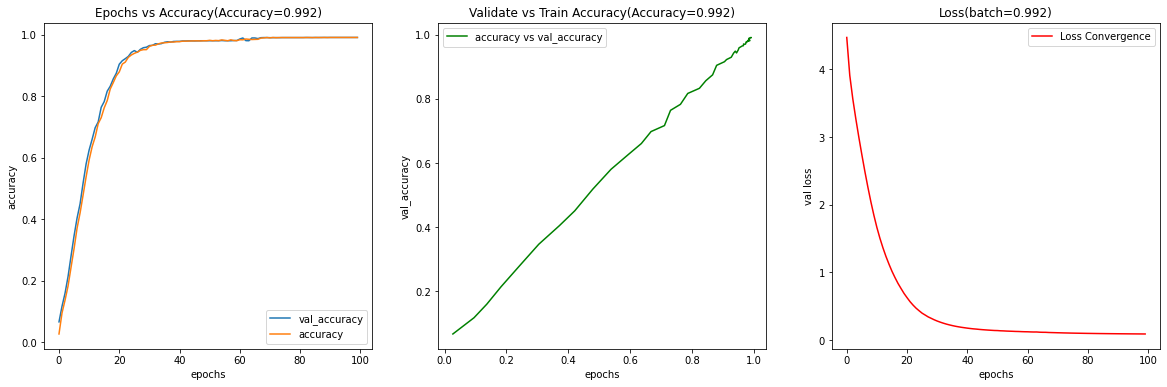

Running for multilayer models with layer 4
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 10)                2010      
                                                                 
 dense_26 (Dense)            (None, 10)                110       
                                                                 
 dense_27 (Dense)            (None, 10)                110       
                                                                 
 dense_28 (Dense)            (None, 10)                110       
                                                                 
 dense_29 (Dense)            (None, 100)               1100      
                                                                 
Total params: 3,440
Trainable params: 3,440
Non-trainable params: 0
_________________________________________________________________
None


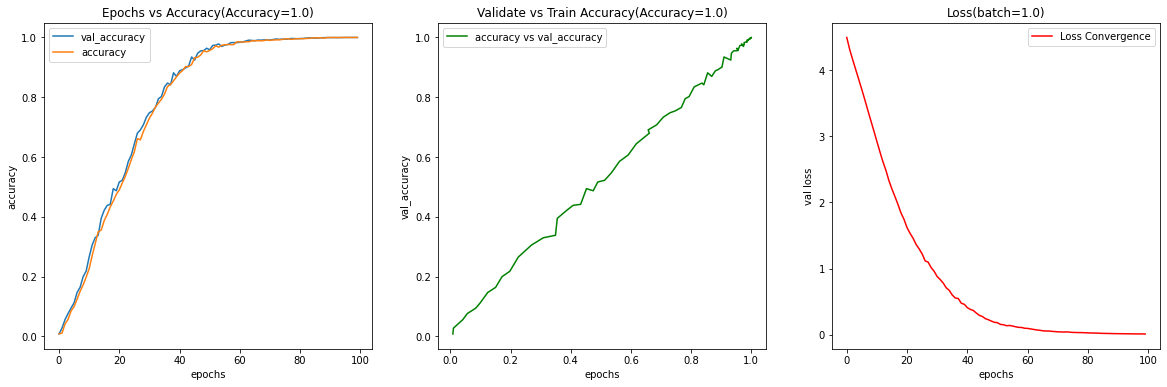

Running for multilayer models with layer 6
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 10)                2010      
                                                                 
 dense_31 (Dense)            (None, 10)                110       
                                                                 
 dense_32 (Dense)            (None, 10)                110       
                                                                 
 dense_33 (Dense)            (None, 10)                110       
                                                                 
 dense_34 (Dense)            (None, 10)                110       
                                                                 
 dense_35 (Dense)            (None, 10)                110       
                                                                 
 dense_36 

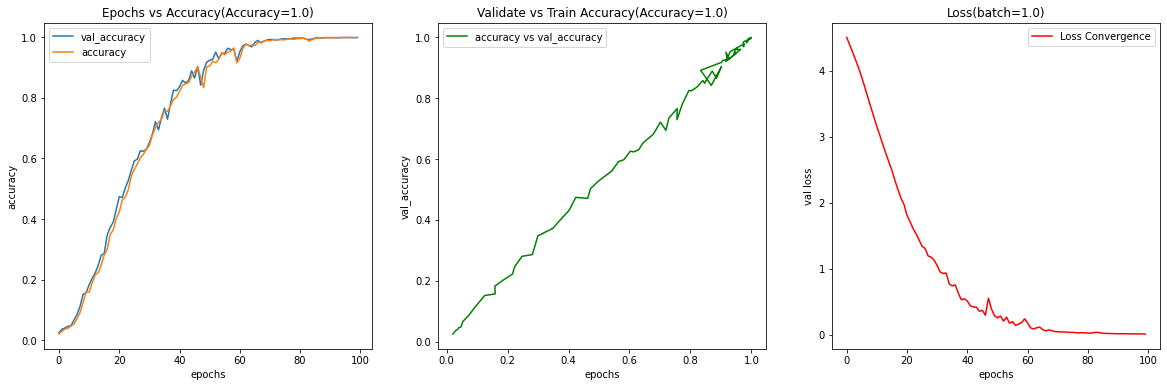

Running for multilayer models with layer 8
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 10)                2010      
                                                                 
 dense_38 (Dense)            (None, 10)                110       
                                                                 
 dense_39 (Dense)            (None, 10)                110       
                                                                 
 dense_40 (Dense)            (None, 10)                110       
                                                                 
 dense_41 (Dense)            (None, 10)                110       
                                                                 
 dense_42 (Dense)            (None, 10)                110       
                                                                 
 dense_43 

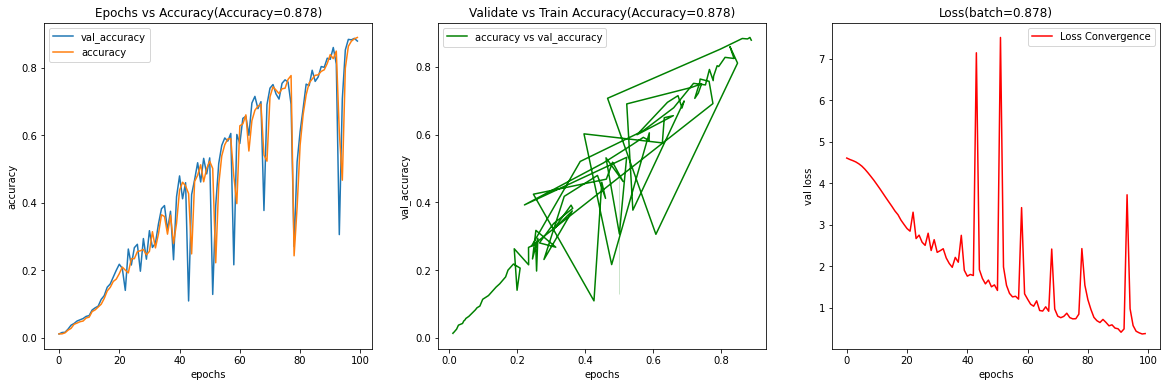

In [19]:
if(True):
  layerbump=range(2,10,2)
  for i in range(len(layerbump)):
    print('Running for multilayer models with layer',layerbump[i])
    NaiveModelFactory_MultiLayer(10,layerbump[i],trainX,trainy,testX,testy)

Running for multilayer models with neuron count 200
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 200)               40200     
                                                                 
 dense_61 (Dense)            (None, 190)               38190     
                                                                 
 dense_62 (Dense)            (None, 180)               34380     
                                                                 
 dense_63 (Dense)            (None, 170)               30770     
                                                                 
 dense_64 (Dense)            (None, 160)               27360     
                                                                 
 dense_65 (Dense)            (None, 150)               24150     
                                                                 
 

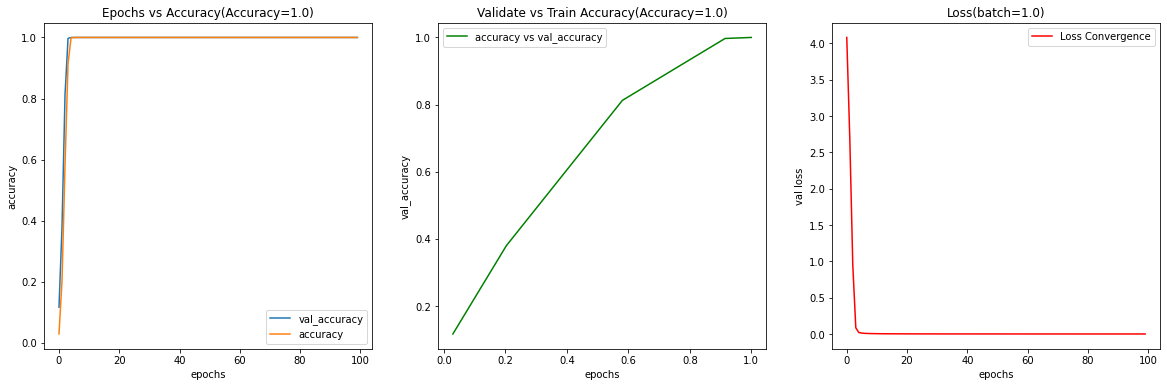

In [23]:
if(True):
  neuronCount = 200
  print('Running for multilayer models with neuron count',neuronCount)
  NaiveModelFactory_MultiLayer_Funnel(neuronCount,10,trainX,trainy,testX,testy)